# Week 6 Assignment
## Diamonds Dataset
The diamonds dataset contains information about approximately 54,000 diamonds. <br>
The dataset contains 11 columns. <br>
The dataset is from the R programming language, and its dictionary can be found here: <link> https://ggplot2.tidyverse.org/reference/diamonds.html </link> <br>
The data is analyzed using the pandas library. 

### Problem 0
Load the diamonds dataset, so it can be analyzed. <br>
I uploaded the diamonds dataset to my github account, and used pandas read_csv function to read the diamonds.csv file into a pandas dataframe. <br>
I store the dataframe in a variable called diamonds. <br>
I then call the head method to display the first 5 rows of the diamonds dataset, and insure that the load worked properly.

In [1]:
import pandas as pd
# read csv data into dataframe.
diamonds = pd.read_csv('https://raw.githubusercontent.com/ngb0330/DAV-5400/master/Week%206/diamonds.csv')

In [2]:
# display first 5 rows of diamonds dataset
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Problem 1
What proportion of diamonds are between 0.30 and 1.08 carats? <br>
To answer this question, I use pandas' query method to find the rows in the diamonds dataframe that are between 0.30 and 1.08 carats. <br>
I call the shape method on the result of that query and subset the result to get the first value of the shape method (which is the number of rows in the data). <br>
I then divide the number of rows returned by my query, by the number of rows in the entire diamonds dataframe (found once again by calling shape method on the entire dataframe, and using subsetting to get the first value returned, which is the number of rows). <br>
The result is the proportion of diamonds that have between 0.30 and 1.08 carats, which is 0.7468 of the diamonds in the dataset.

In [3]:
# find proportion of diamonds with between 0.30 and 1.08 carats
diamonds.query('0.30 <= carat <= 1.08').shape[0]/diamonds.shape[0]

0.7468298109010011

### Problem 2
How many of the diamonds have equal x and y dimensions? <br>
To answer this question, I found a subset of the diamonds dataframe where its x value equaled its y value, and used the shape to get the number of rows in the dataframe. <br>
There were 17 rows in the dataframe, so there are 17 diamonds that have equal x and y values.

In [4]:
# find number of diamonds where x equals y.
diamonds[diamonds['x'] == diamonds['y']].shape[0]

17

### Problem 3
How many diamonds have a carat less than the mean carat value? <br>
To answer this question, I found a subset of the diamonds dataframe where the carat is less than the mean carat value. <br>
The mean carat value is found by calling the mean method on the carat column of the dataframe. <br>
I then used the shape to get the number of rows in my subset of the dataframe. <br>
The number of rows was 31127 so there are 31127 diamonds with carat greater than the mean carat value. <br>
This implies that the data is right skewed as there are more than half the values less than the mean.

In [5]:
# find number of diamonds where carat weight is less 
# than mean carat weight
diamonds[diamonds['carat']< diamonds['carat'].mean()].shape[0]

31127

### Problem 4
How many diamonds have a premium cut or better? <br>
To answer this question, I found a subset of the diamonds dataframe with cut of either premium or ideal (as the only cut better than premium is ideal). <br>
I then used the shape method to find the number of rows in the subsetted dataframe, which was 35342. <br>
So there are 35342 diamonds in the dataset with a cut of Premium or better. 

In [6]:
# find number of diamonds with cut of premium or better.
diamonds[(diamonds['cut'] == 'Premium') | (diamonds['cut'] == 'Ideal')].shape[0]

35342

### Problem 5
Which diamond has the highest price per carat? What is its value?
To answer this question, I created a new column in the dataframe called price_per_carat. <br>
The column is generated by dividing the price value by the carat value for each row in the dataframe. <br>
I then displayed the highest price per carat, which is found using the max method, and is 17828.85 dollars. <br>
I then used the idxmax method on the price_per_carat column to find the index of the diamond with the highest price per carat, which was 27635. <br>
So diamond 276435 has the highest price per carat <br>
I then used the iloc method to find the price of the diamond located at index 27635, and the price is 18542 dollars. <br>
So the value of the diamond is 18542 dollars.

In [7]:
# create price_per_carat column in dataframe.
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

In [8]:
# find maximum price_per_carat
diamonds['price_per_carat'].max()

17828.846153846152

In [9]:
# find index where price_per_carat is max value.
diamonds['price_per_carat'].idxmax()

27635

In [10]:
# find price of diamond at index found to have 
# max price per carat
diamonds.iloc[27635]['price']

18542

### Problem 6
Make a bar plot of the cut data. <br>
To make the bar plot, I first found the value counts of each cut (ie. the number of diamonds with each cut) using the value_counts method, and used the bar method of plot to create the bar plot of the cut data. <br>
From this bar plot, I concluded: <br>
    1. The most common cut type in the dataset is ideal.
    2. The least common cut type in the dataset is fair. 
    3. The distribution of cut types follows the quality of cut in descending order.
        a. It is in order of ideal, premium, very good, good, fair, which is from best to worst. 
    4. There are fewer than 10,000 diamonds in the dataset that are a cut of good or worse. 

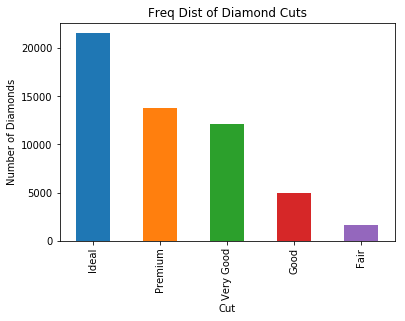

In [18]:
# make a barplot of the cut data.
cut_bplt = diamonds['cut'].value_counts().plot.bar(title = 'Freq Dist of Diamond Cuts')
# set the labels for the axes on the graph.
cut_bplt.set_xlabel('Cut')
cut_bplt.set_ylabel('Number of Diamonds')
# display the graph and suppress output. 
cut_bplt;

### Problem 7
Make boxplots for diamond price for each cut. <br>
I used pandas boxplot method on the diamonds dataframe, to make a boxplot of price data grouped by cut. <br>
From this boxplot I concluded: <br>
    1. Every cut has price values that are outliers, ie. greater than 1.5 times the third quartile. 
    2. The ideal cut has the lowest mean price, while the mean price for fair, good, and premium cuts are about the same, and the highest in the data.
        a. This is surprising as one might expect that diamonds with an ideal cut would have the highest prices,    but the mean price is actually lowest for ideal cut. 
    3. The IQR of the prices with fair cut is smallest, while the IQR for premium cut is largest.

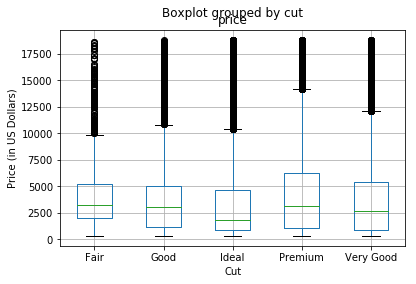

In [12]:
# make a boxplot of the price data grouped by cut.
price_by_cut_bxplt = diamonds.boxplot(column = 'price', by = 'cut')
# set the labels for the axes on the graph.
price_by_cut_bxplt.set_xlabel('Cut')
price_by_cut_bxplt.set_ylabel('Price (in US Dollars)')
# display the graph and suppress output. 
price_by_cut_bxplt;

### Problem 8
#### Length of the Diamonds
Make a histogram of the length of the diamonds. <br>
The length is stored in the x attribute. <br>
I used the hist method on the x column of the dataframe to create the histogram. <br>
From the histogram, I conlcluded: <br>
    1. Most of the diamonds have between 4 and 6 mm of length.
    2. There are more than 20,000 diamonds with length of approximately 5mm.

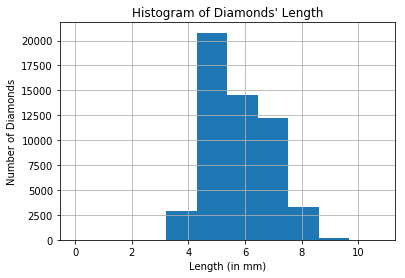

In [13]:
# make a histogram of the length of diamonds.
length_hist = diamonds['x'].hist()
# set title and axes labels of the graph.
length_hist.set_title("Histogram of Diamonds' Length")
length_hist.set_xlabel('Length (in mm)')
length_hist.set_ylabel('Number of Diamonds')
# display the graph and suppress the output.
length_hist;

#### Width of the Diamonds
Make a histogram of the width of the diamonds. <br>
The length is stored in the y attribute. <br>
I used the hist method on the y column of the dataframe to create the histogram. <br>
From the histogram, I conlcluded: <br>
    1. Most of the diamonds have between 0 and 5 mm of width.
    2. There are more than 30,000 diamonds with width up to about 5 mm.
    3. The reason that the x axis is so large, even though the bins seem to end at around 11 mm of width is because there are some diamonds that have width greater than 11 mm, as specified in the data dictionary.
        a. The largest width, according to the data dictionary is 58.9 mm.
        b. Since the y axis is in increments of 5000, you cannot see the bar that represents that maximum value, because it is too small.

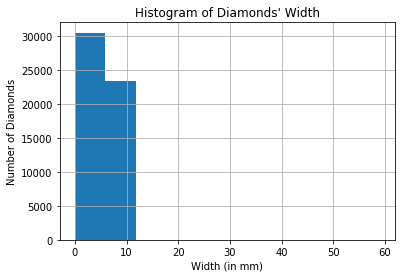

In [14]:
# make a histogram of the width of diamonds.
width_hist = diamonds['y'].hist()
# set title and axes labels of the graph.
width_hist.set_title("Histogram of Diamonds' Width")
width_hist.set_xlabel('Width (in mm)')
width_hist.set_ylabel('Number of Diamonds')
# display the graph and suppress the output.
width_hist;

#### Depth of the Diamonds
Make a histogram of the depth of the diamonds. <br>
The length is stored in the z attribute. <br>
I used the hist method on the z column of the dataframe to create the histogram. <br>
From the histogram, I conlcluded: <br>
    1. Most of the diamonds have between 4 and 6 mm of depth.
    2. There are slightly less than 35,000 diamonds with depth between 4 and 6 mm.
     3. The reason that the x axis is so large, even though the bins seem to end at around 6 mm of depth is because there are some diamonds that have depth greater than 6 mm, as specified in the data dictionary.
        a. The largest depth, according to the data dictionary is 31.8 mm.
        b. Since the y axis is in increments of 5000, you cannot see the bar that represents that maximum value, because it is too small.

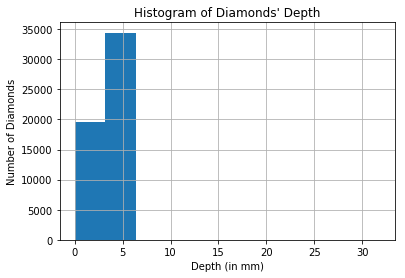

In [15]:
# make a histogram of the depth of diamonds.
depth_hist = diamonds['z'].hist()
# set title and axes labels of the graph.
depth_hist.set_title("Histogram of Diamonds' Depth")
depth_hist.set_xlabel('Depth (in mm)')
depth_hist.set_ylabel('Number of Diamonds')
# display the graph and suppress the output.
depth_hist;

#### Total Depth of the Diamonds
Make a histogram of the total depth of the diamonds. <br>
The length is stored in the depth attribute. <br>
I used the hist method on the depth column of the dataframe to create the histogram. <br>
From the histogram, I conlcluded: <br>
    1. Most of the diamonds have between about 62.5% total depth.
    2. There are slightly more than 40,000 diamonds with total depth of about 62.5%.
     3. The reason that the x axis is so large, even though the bins seem to end at around 70% total depth is because there are some diamonds that have total depth greater than 70%, as specified in the data dictionary.
        a. The largest total depth, according to the data dictionary is 79%.
        b. The smallest total depth is 43% which explains why the x axis starts at 45%. 
        c. Since the y axis is in increments of 5000, you cannot see the bars that represent those values, because they are too small.
       

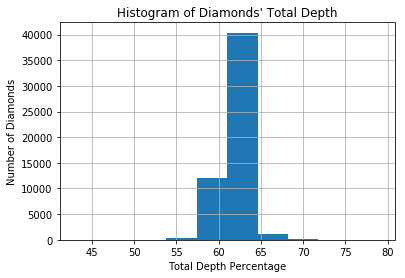

In [16]:
# make a histogram of the total depth of diamonds.
total_depth_hist = diamonds['depth'].hist()
# set title and axes labels of the graph.
total_depth_hist.set_title("Histogram of Diamonds' Total Depth")
total_depth_hist.set_xlabel('Total Depth Percentage')
total_depth_hist.set_ylabel('Number of Diamonds')
# display the graph and suppress the output.
total_depth_hist;

### Problem 9
Make a scatter plot of diamond price vs. carat. <br>
I used the scatter method of plot in pandas to create the scatter plot with x values of price and y values of carat. <br>
From this scatter plot I concluded: <br>
    1. There is a positive relationship between price and carat. 
    2. A diamond with a higher price, will likely have a higher carat. 

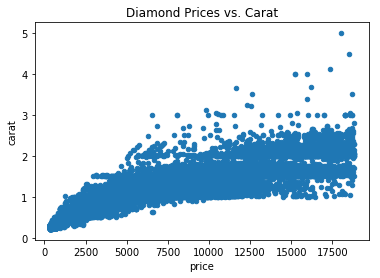

In [17]:
# make a scatter plot of price vs. carat
price_carat_scatplt = diamonds.plot.scatter(x = 'price', y = 'carat')
# set the title of the plot.
price_carat_scatplt.set_title('Diamond Prices vs. Carat')
# display the graph and suppress output. 
price_carat_scatplt;